<a href="https://colab.research.google.com/github/Pritu04/Python/blob/main/Diwali_Sales_Data_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diwali Sales Data – Exploratory Data Analysis (EDA)**

Platform: Google Colab
Tool: Python
Dataset: Diwali Sales Data

**1. Project Objective**

The objective of this project is to:

Understand customer purchasing behavior during Diwali

Identify top-selling products, categories, and regions

Analyze gender, age group, and marital status impact on sales

Provide business insights for marketing and sales strategy

**2. Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


**3. Load Dataset**

In [5]:
df = pd.read_csv('/content/Diwali Sales Data.csv', encoding='unicode_escape')
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


**4. Dataset Information**

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.shape


(11251, 15)

**5. Data Cleaning**
🔹 **5.1 Drop Unnecessary Columns **

In [8]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)


**5.2 Handle Missing Values**

In [9]:
df.isnull().sum()


,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [10]:
df.dropna(inplace=True)


**6. Data Type Correction**

In [11]:
df['Amount'] = df['Amount'].astype('int')


**7. Statistical Summary**

In [12]:
df.describe()


,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


**8. Exploratory Data Analysis (EDA)**

**8.1 Gender Analysis**

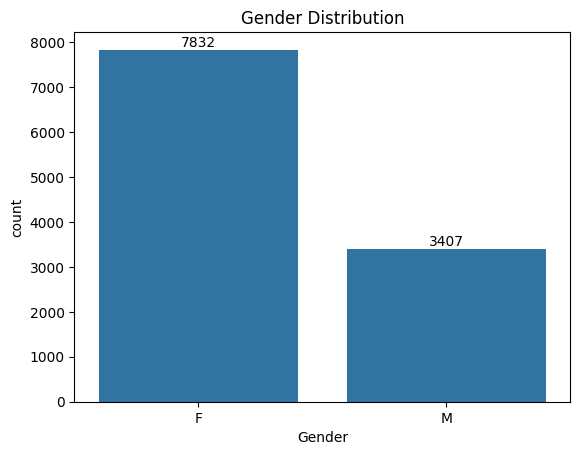

In [13]:
ax = sns.countplot(x='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Gender Distribution")
plt.show()


**Insight:**

Female customers make more purchases during Diwali.

**8.2 Gender vs Total Sales**

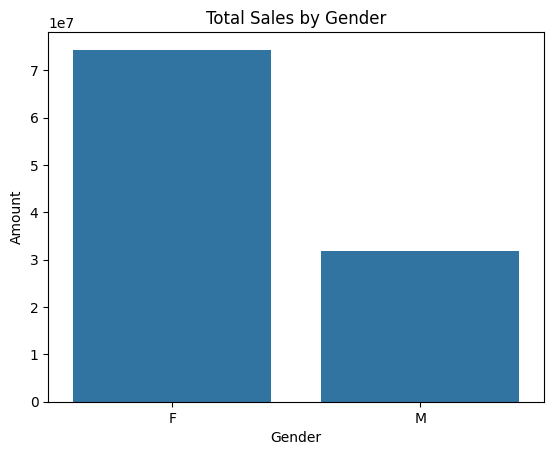

In [14]:
sales_gen = df.groupby('Gender')['Amount'].sum().reset_index()

sns.barplot(x='Gender', y='Amount', data=sales_gen)
plt.title("Total Sales by Gender")
plt.show()


**8.3 Age Group Analysis**

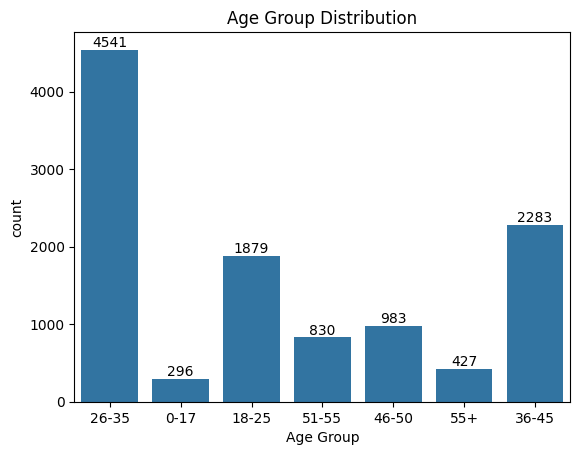

In [15]:
ax = sns.countplot(x='Age Group', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Age Group Distribution")
plt.show()


**8.4 Age Group vs Sales**

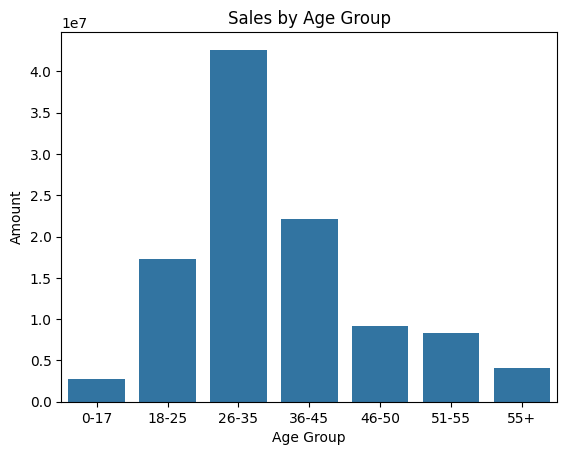

In [16]:
age_sales = df.groupby('Age Group')['Amount'].sum().reset_index()

sns.barplot(x='Age Group', y='Amount', data=age_sales)
plt.title("Sales by Age Group")
plt.show()


**Insight:**

Age group 26–35 years contributes the highest sales.

**8.5 State-wise Orders**

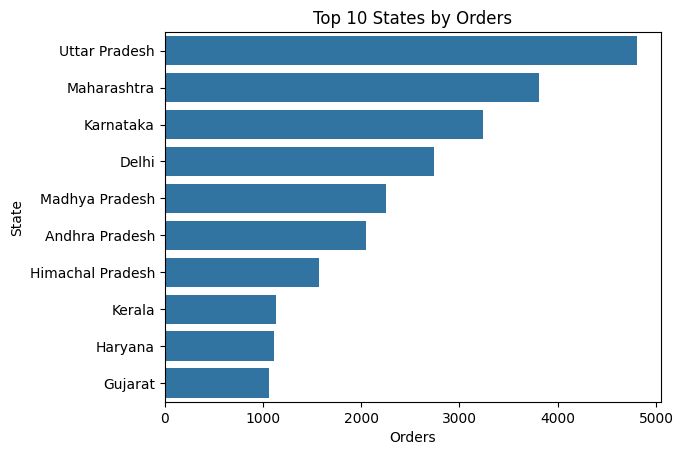

In [17]:
state_orders = df.groupby('State')['Orders'].sum().nlargest(10).reset_index()

sns.barplot(x='Orders', y='State', data=state_orders)
plt.title("Top 10 States by Orders")
plt.show()


**8.6 State-wise Sales**

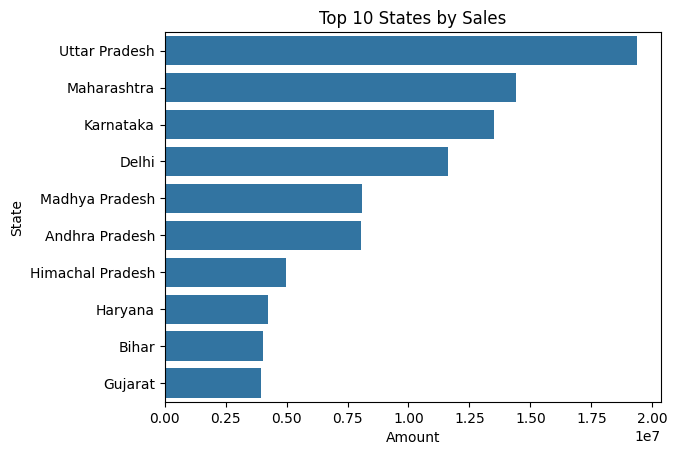

In [18]:
state_sales = df.groupby('State')['Amount'].sum().nlargest(10).reset_index()

sns.barplot(x='Amount', y='State', data=state_sales)
plt.title("Top 10 States by Sales")
plt.show()


**8.7 Marital Status Analysis**

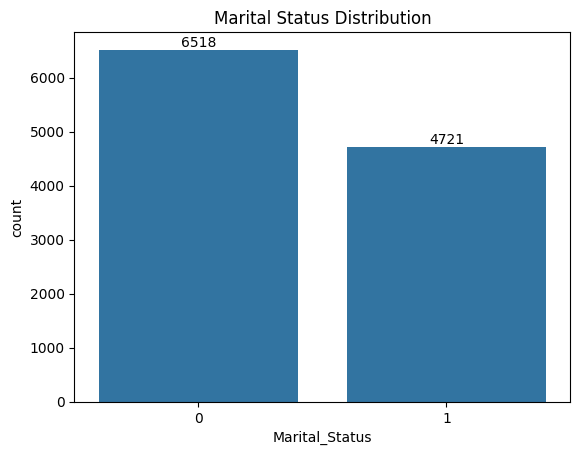

In [19]:
ax = sns.countplot(x='Marital_Status', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Marital Status Distribution")
plt.show()


**8.8 Occupation Analysis**

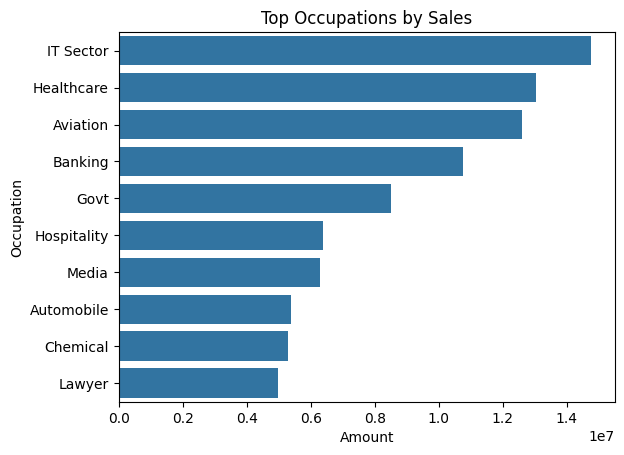

In [20]:
occupation_sales = df.groupby('Occupation')['Amount'].sum().nlargest(10).reset_index()

sns.barplot(x='Amount', y='Occupation', data=occupation_sales)
plt.title("Top Occupations by Sales")
plt.show()


**8.9 Product Category Analysis**

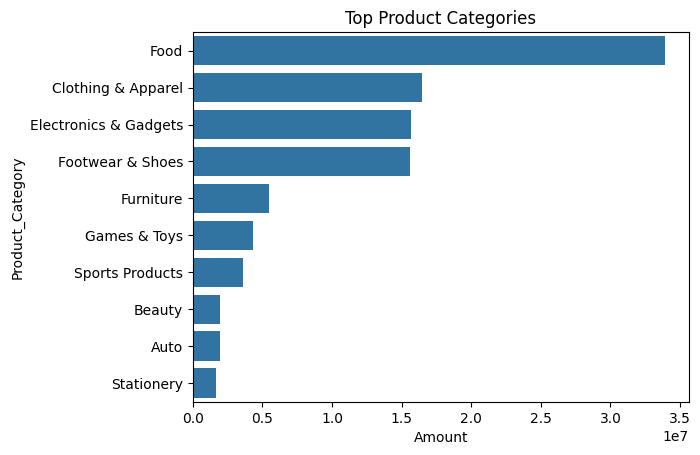

In [21]:
category_sales = df.groupby('Product_Category')['Amount'].sum().nlargest(10).reset_index()

sns.barplot(x='Amount', y='Product_Category', data=category_sales)
plt.title("Top Product Categories")
plt.show()


**8.10 Top Selling Products**

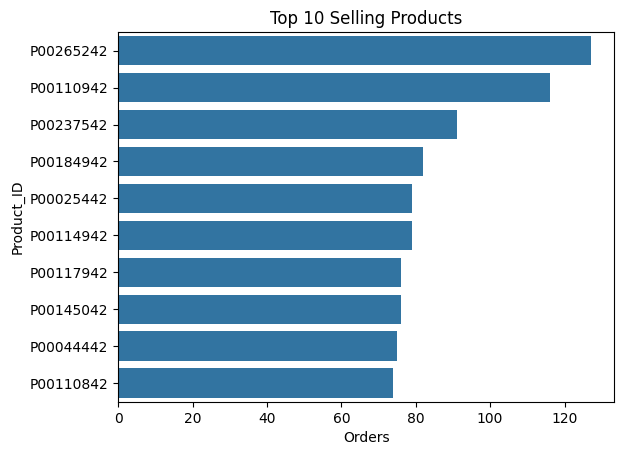

In [22]:
product_sales = df.groupby('Product_ID')['Orders'].sum().nlargest(10).reset_index()

sns.barplot(x='Orders', y='Product_ID', data=product_sales)
plt.title("Top 10 Selling Products")
plt.show()


**EXTRA ADVANCED EDA CHARTS**

**1. Heatmap – Correlation Analysis**

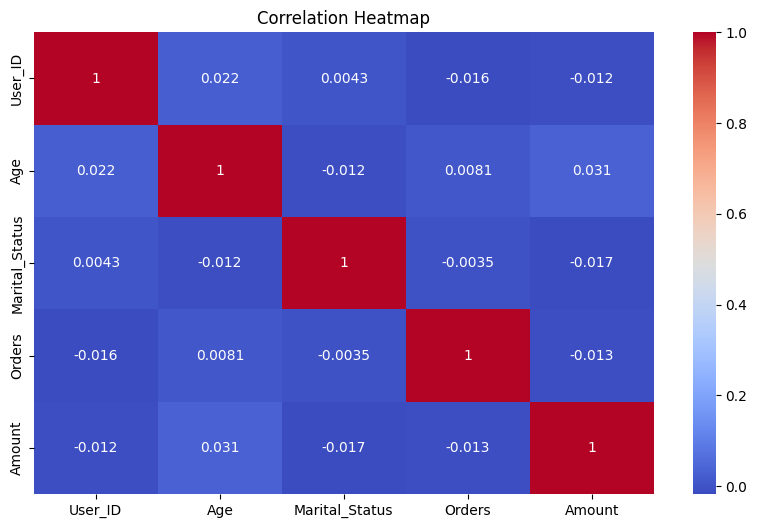

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Insight:**

Strong correlation between Orders and Amount

Helps identify features for ML models

**2. Gender vs Age Group vs Sales (Pivot Heatmap)**

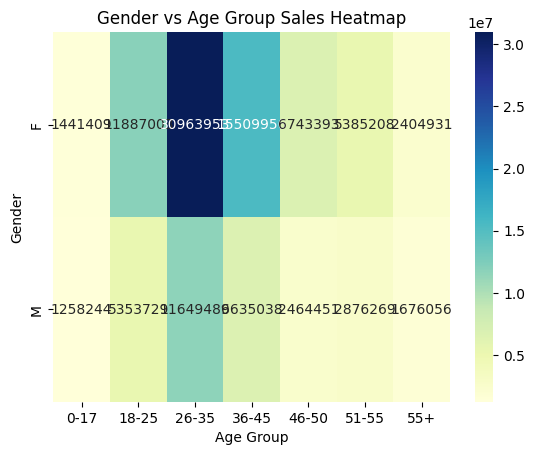

In [24]:
pivot_gender_age = df.pivot_table(values='Amount',
                                  index='Gender',
                                  columns='Age Group',
                                  aggfunc='sum')

sns.heatmap(pivot_gender_age, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Gender vs Age Group Sales Heatmap")
plt.show()


**3. State vs Category – Sales Heatmap**

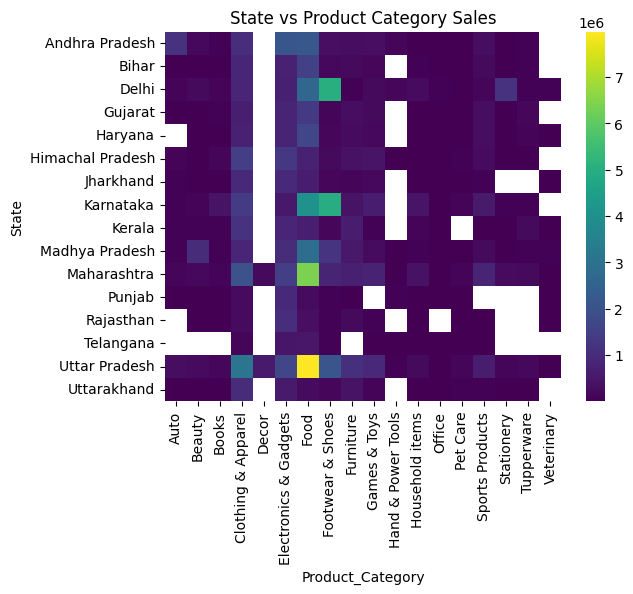

In [25]:
pivot_state_category = df.pivot_table(values='Amount',
                                      index='State',
                                      columns='Product_Category',
                                      aggfunc='sum')

sns.heatmap(pivot_state_category, cmap='viridis')
plt.title("State vs Product Category Sales")
plt.show()


**4. Distribution Plot – Purchase Amount**

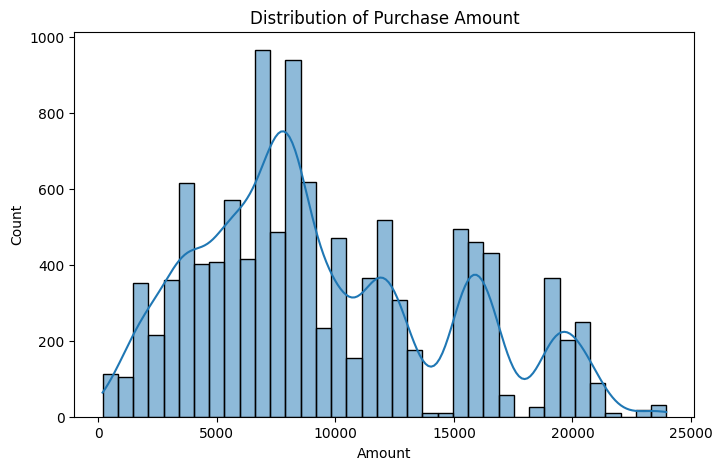

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], kde=True)
plt.title("Distribution of Purchase Amount")
plt.show()


**Insight:**

Right-skewed distribution

Few customers contribute high revenue

**5. Box Plot – Amount by Gender**

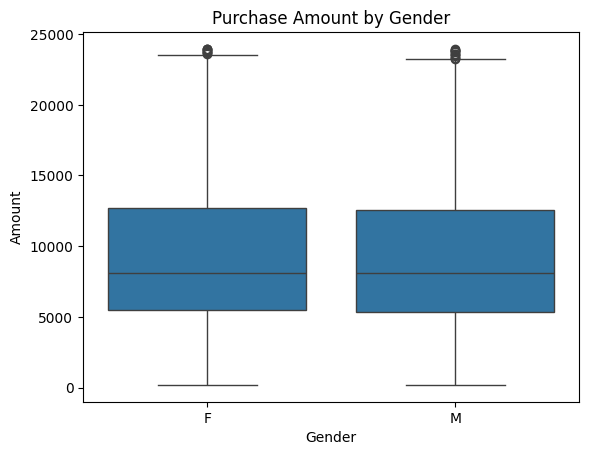

In [27]:
sns.boxplot(x='Gender', y='Amount', data=df)
plt.title("Purchase Amount by Gender")
plt.show()


**6. Box Plot – Amount by Marital Status**

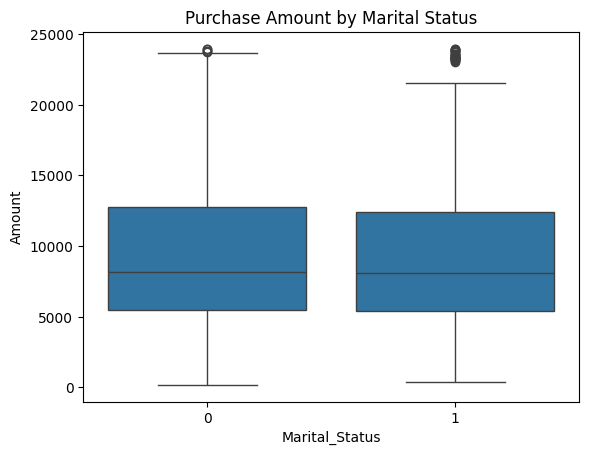

In [28]:
sns.boxplot(x='Marital_Status', y='Amount', data=df)
plt.title("Purchase Amount by Marital Status")
plt.show()


**7. Occupation vs Average Sales**

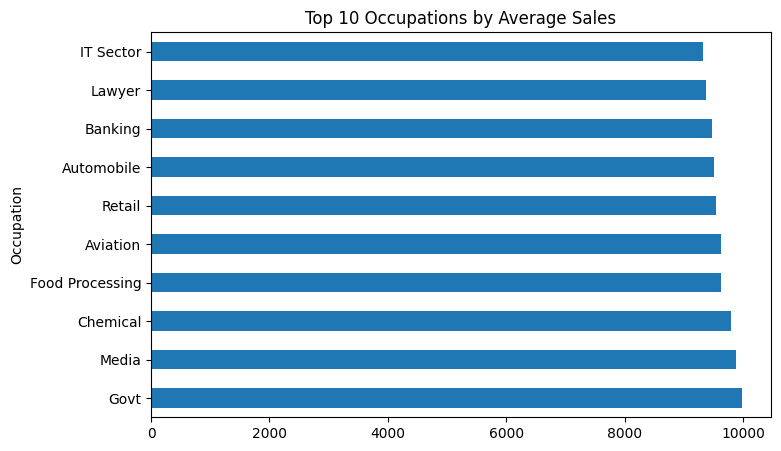

In [29]:
occupation_avg = df.groupby('Occupation')['Amount'].mean().sort_values(ascending=False).head(10)

occupation_avg.plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Occupations by Average Sales")
plt.show()


**8. Product Category Contribution (% Share)**

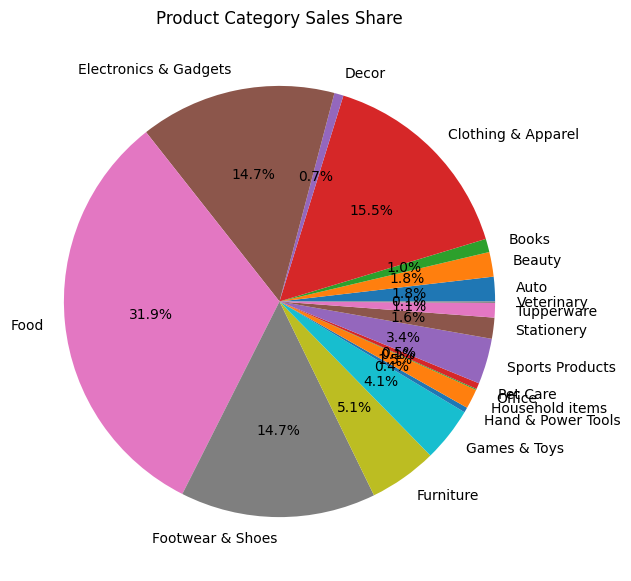

In [30]:
category_share = df.groupby('Product_Category')['Amount'].sum()
category_share.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.title("Product Category Sales Share")
plt.ylabel('')
plt.show()


**9. Orders vs Amount Scatter Plot**

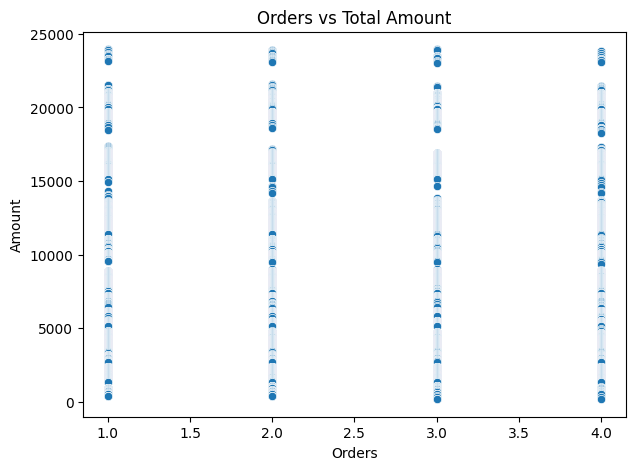

In [31]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Orders', y='Amount', data=df)
plt.title("Orders vs Total Amount")
plt.show()


**10. Top 10 Customers by Sales**

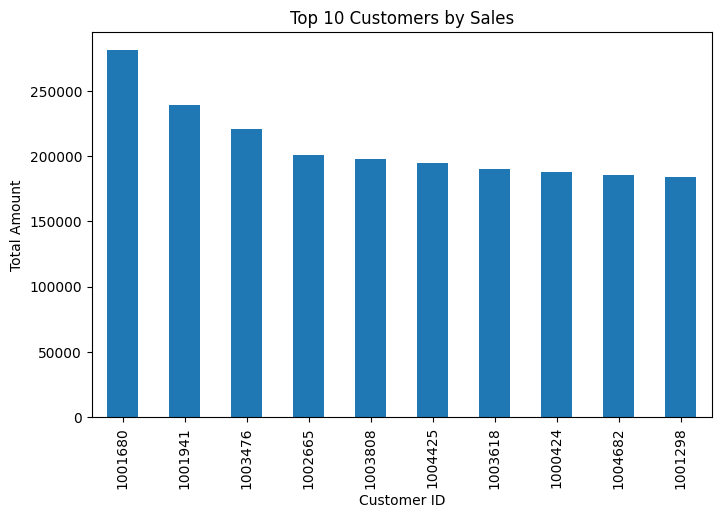

In [32]:
top_customers = df.groupby('User_ID')['Amount'].sum().nlargest(10)

top_customers.plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Customers by Sales")
plt.xlabel("Customer ID")
plt.ylabel("Total Amount")
plt.show()


**9. Key Insights**

- Female customers dominate Diwali shopping
- Age group 26–35 years contributes maximum revenue
- Uttar Pradesh, Maharashtra & Karnataka are top states
- Married customers spend more
- IT, Healthcare & Aviation professionals are key buyers
- Food, Clothing & Electronics are top product categories
- Heatmaps show hidden patterns
- Box plots highlight outliers & spending behavior
- Distribution plots explain customer spending spread
- Scatter plots show sales volume relationships

**10. Conclusion**

 This EDA reveals important trends in Diwali sales behavior.
Businesses can:

- Target female customers and young adults

- Focus marketing in top-performing states

- Promote high-demand categories during festive sales

11. Future Scope
**bold text**
- Predict sales using Machine Learning

- Customer segmentation using clustering

- Recommendation systems